# Messy vs Clean Room Detection using CNN and TensorFlow

- Nama : Andi Dwi Prastyo
- Instansi : Politeknik Negeri Malang
- Jurusan : Teknologi Informasi
- Prodi : D4 - Teknik Informatika

### Import Libraries

In [29]:
import numpy as np 
import pandas as pd 
import os
import math

import matplotlib.pyplot as plt
import seaborn as sns 

import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Image Directory

In [30]:
base_dir = './images/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

### Image Augmentation

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, rotation_range=20, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=4, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=4, class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


### CNN Modelling

In [33]:
cnn = tf.keras.models.Sequential([
	tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
	tf.keras.layers.MaxPooling2D(2,2),
	tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
	tf.keras.layers.MaxPooling2D(2,2),
	tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
	tf.keras.layers.MaxPooling2D(2,2),
	tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
	tf.keras.layers.MaxPooling2D(2,2),
 	tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
	tf.keras.layers.MaxPooling2D(2,2),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(512, activation='relu'),
	tf.keras.layers.Dense(1, activation='sigmoid')
])

In [34]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 17, 17, 128)      

### Compiling the CNN Model

In [35]:
cnn.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

### Training the CNN Model

In [36]:
cnn.fit(train_generator, steps_per_epoch=25, epochs=30, verbose=2, validation_data=validation_generator, validation_steps=5)

Epoch 1/30


25/25 - 4s - loss: 0.7034 - accuracy: 0.4700 - val_loss: 0.6932 - val_accuracy: 0.5000 - 4s/epoch - 179ms/step
Epoch 2/30
25/25 - 3s - loss: 0.6932 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.5000 - 3s/epoch - 130ms/step
Epoch 3/30
25/25 - 3s - loss: 0.6926 - accuracy: 0.5300 - val_loss: 0.6923 - val_accuracy: 0.5000 - 3s/epoch - 130ms/step
Epoch 4/30
25/25 - 3s - loss: 0.6967 - accuracy: 0.5300 - val_loss: 0.6822 - val_accuracy: 0.6000 - 3s/epoch - 133ms/step
Epoch 5/30
25/25 - 3s - loss: 0.6663 - accuracy: 0.6700 - val_loss: 0.6170 - val_accuracy: 0.6000 - 3s/epoch - 129ms/step
Epoch 6/30
25/25 - 3s - loss: 0.7368 - accuracy: 0.6400 - val_loss: 0.7500 - val_accuracy: 0.5000 - 3s/epoch - 129ms/step
Epoch 7/30
25/25 - 3s - loss: 0.7069 - accuracy: 0.5000 - val_loss: 0.6847 - val_accuracy: 0.5000 - 3s/epoch - 133ms/step
Epoch 8/30
25/25 - 3s - loss: 0.6848 - accuracy: 0.5100 - val_loss: 0.6643 - val_accuracy: 0.5500 - 3s/epoch - 128ms/step
Epoch 9/30
25/25 - 3s - loss: 0.652

### Evaluating the CNN Model

1/1 [==============================] - 0s 23ms/step
The image is predicted to be a clean room:  [[0.1306754]]


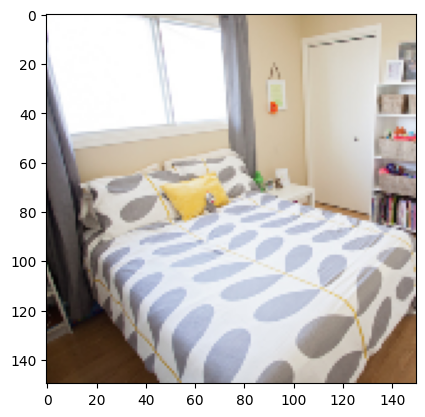

In [40]:
# load the image
img_path = './images/images/test/9.png'
img = image.load_img(img_path, target_size=(150,150))

# convert the image to array
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# normalize the image
x = x/255.0

# predict the class
prediction = cnn.predict(x)

# print the prediction
if prediction > 0.4:
	print('The image is predicted to be a messy room: ', prediction)
else:
	print('The image is predicted to be a clean room: ', prediction)

plt.imshow(img)
plt.show()
